<a href="https://colab.research.google.com/github/samer-glitch/Leveraging-Machine-Learning-for-Identifying-and-Classifying-Cyber-Threats-in-Network-Environments/blob/main/Implementing%20different%20Machine%20Learning%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv to Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv


**Code# 1.1
Implementing the following Machine Learning models:
 LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier**

**## - Model Performance Metrics: accuracy_score, f1_score, confusion_matrix, roc_curve, auc, precision_score, recall_score**

Dataset Loaded - Time Elapsed: 0:00:00.000070
Labeling Function Applied - Time Elapsed: 0:00:05.375466
Categorical Labels Encoded - Time Elapsed: 0:00:05.380359
Features and Target Variable Defined - Time Elapsed: 0:00:05.383597
Data Split into Train and Test Sets - Time Elapsed: 0:00:05.394081
Non-numeric Columns Handled - Time Elapsed: 0:00:05.399888
Preprocessing Applied - Time Elapsed: 0:00:05.415250
Classifiers Fitted - Time Elapsed: 0:00:10.611222


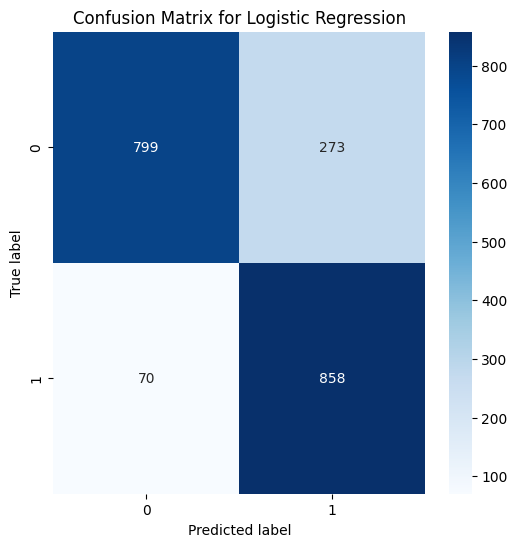

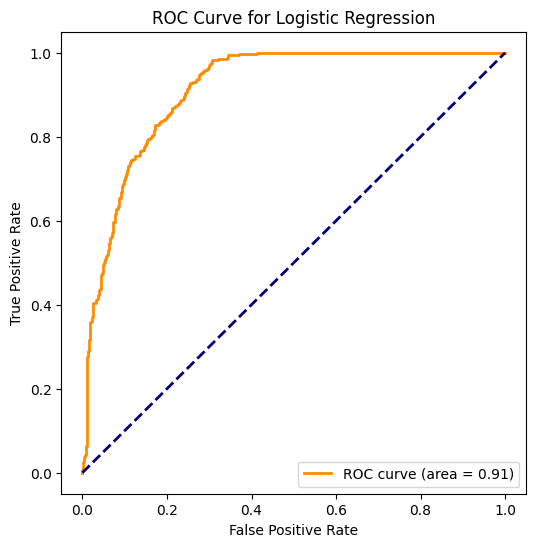

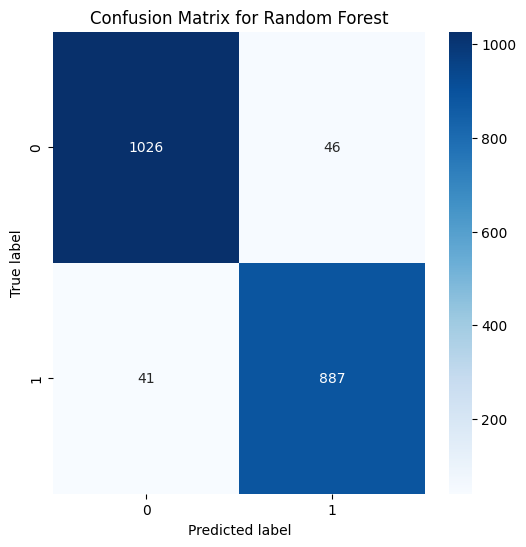

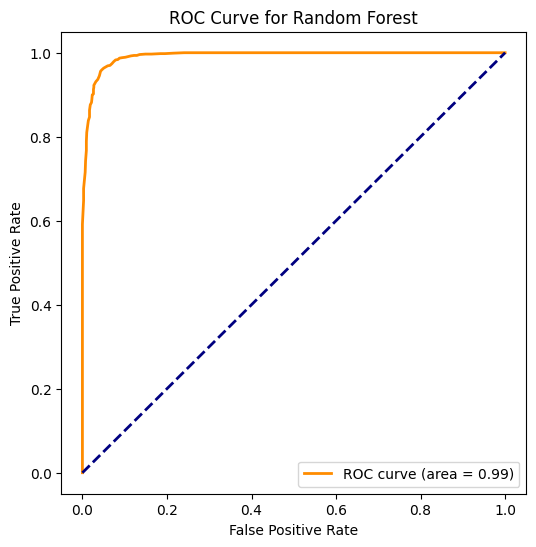

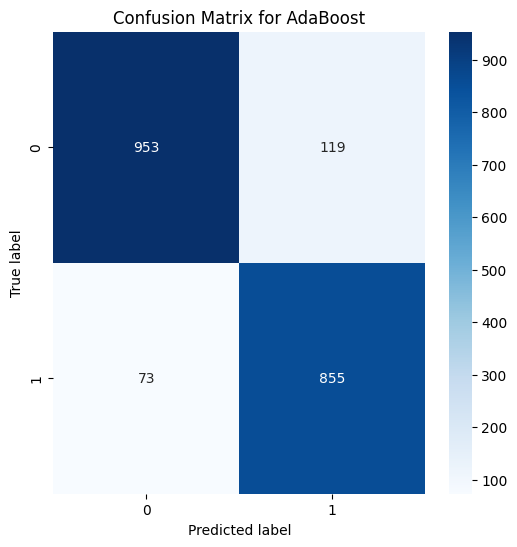

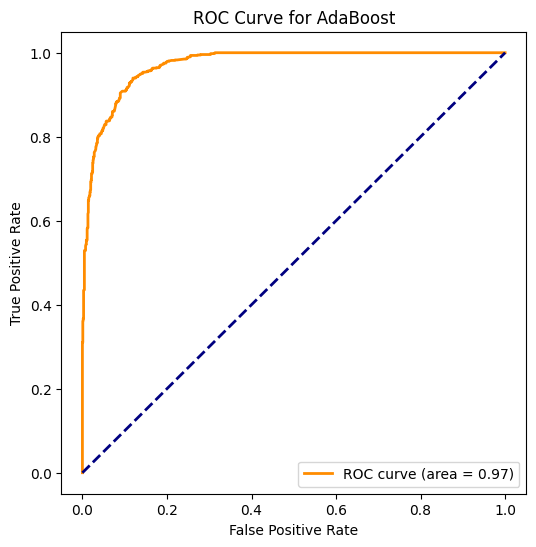

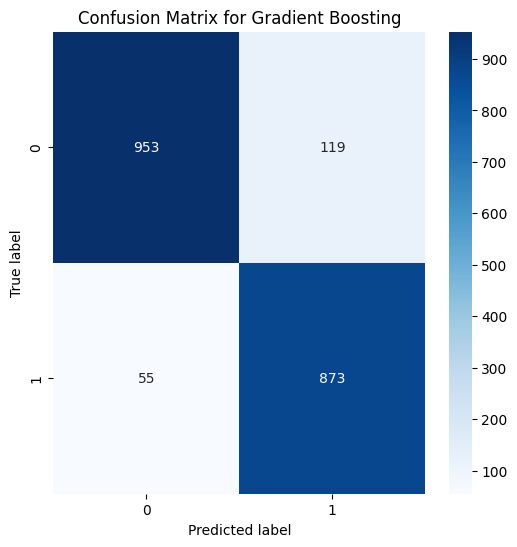

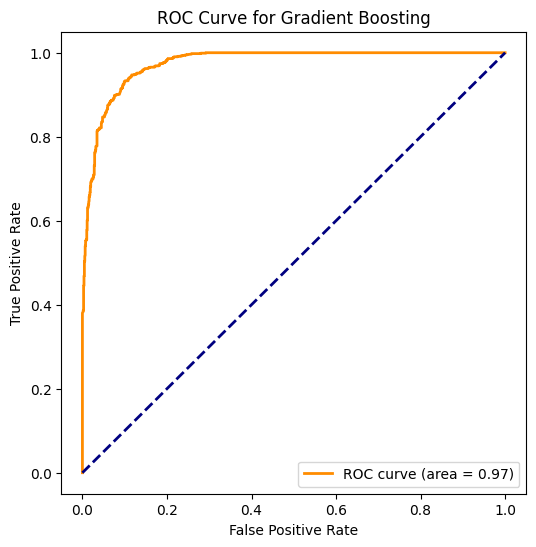

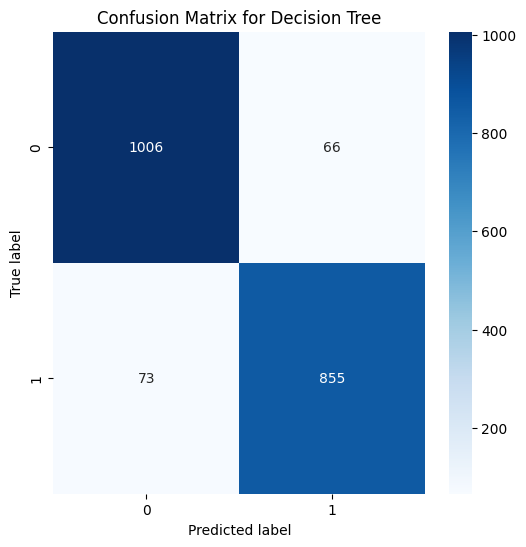

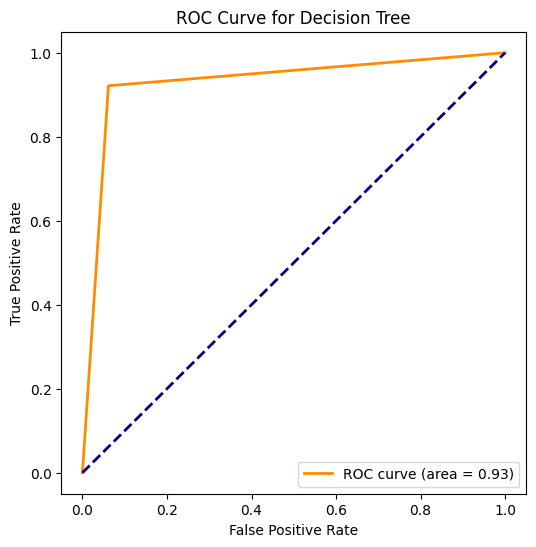


Logistic Regression Classifier:
Accuracy: 0.8285 
F1-Score: 0.8334142787761049

Random Forest Classifier:
Accuracy: 0.9565 
F1-Score: 0.953250940354648

AdaBoost Classifier:
Accuracy: 0.904 
F1-Score: 0.8990536277602523

Gradient Boosting Classifier:
Accuracy: 0.913 
F1-Score: 0.9093749999999999

Decision Tree Classifier:
Accuracy: 0.9305 
F1-Score: 0.9248242293131422

Process Completed - Time: 0:00:12.992083


In [13]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

def record_time(step_name, overall_start_time):
    print(f"{step_name} - Time Elapsed: {datetime.datetime.now() - overall_start_time}")

def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_scores, classifier_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv')

overall_start_time = datetime.datetime.now()
record_time("Dataset Loaded", overall_start_time)

def label_traffic(df):
    # Define normal thresholds
    normal_protocols = [6, 17, 1]  # TCP and UDP
    normal_port_range = set(range(0, 49152))
    normal_pkt_count_max = 2000
    normal_octet_count_max = 1000000
    normal_packet_size_range = range(20, 1500)
    normal_flow_duration_range = range(50, 3600000)  # 50 ms to 1 hour
    normal_piat_range = range(0, 10000)  # 0 to 10 seconds
    max_timestamp = int(1e12)  # Assuming timestamp in milliseconds

    # Initialize the traffic_label column
    df['traffic_label'] = 'normal'

    # Vectorized conditions
    df.loc[~df['proto'].isin(normal_protocols), 'traffic_label'] = 'malicious'
    df.loc[df['flowEndReason'] == 1, 'traffic_label'] = 'malicious'
    df.loc[~df['src_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[~df['dst_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[df['pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
    df.loc[df['octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
    df.loc[~df['min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
    df.loc[~df['min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[(df['flowStart'] < 0) | (df['flowStart'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[(df['flowEnd'] < 0) | (df['flowEnd'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[df['flowEnd'] < df['flowStart'], 'traffic_label'] = 'malicious'

    # Process forward and backward flow features
    for prefix in ['f_', 'b_']:
        df.loc[df[prefix + 'pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
        df.loc[df[prefix + 'octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'

    # IP Address checks
    normal_src_ip_ranges = ['192.168.', '10.', '172.']
    df.loc[df['src_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'
    df.loc[df['dst_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'

    # Web service, application protocol, and category checks
    normal_web_services = ['Google', 'Microsoft', 'HTTP', 'DNS', 'Amazon', 'MSN', 'TLS', 'Yahoo', 'DHCP', 'WindowsUpdate', 'NetBIOS', 'RX', 'MS_OneDrive', 'GMail', 'Dropbox', 'GoogleServices', 'ICMP', 'UbuntuONE', 'GoogleDrive', 'YouTube', 'HTTP_Proxy', 'NTP', 'Apple', 'AppleiTunes', 'AppleStore', 'ApplePush', 'AppleiCloud', 'IMAPS', 'IMO', 'Office365', 'Skype', 'Cloudflare']
    normal_application_protocols = ['HTTP', 'TLS', 'DNS', 'QUIC', 'IMAPS', 'STUN', 'SMTPS', 'POPS', 'Skype', 'SMBv23', 'NetBIOS', 'RDP', 'ApplePush', 'MQTT']
    normal_categories = ['Network', 'Web', 'SoftwareUpdate', 'RPC', 'System', 'Cloud', 'Mail', 'FTP', 'VPN', 'RemoteAccess', 'Email', 'Media', 'Streaming', 'VoIP', 'Collaborative']

    df.loc[~df['web_service'].isin(normal_web_services), 'traffic_label'] = 'malicious'
    df.loc[~df['application_protocol'].isin(normal_application_protocols), 'traffic_label'] = 'malicious'
    df.loc[~df['category'].isin(normal_categories), 'traffic_label'] = 'malicious'

    return df

df = label_traffic(df)
record_time("Labeling Function Applied", overall_start_time)

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['traffic_label'])
record_time("Categorical Labels Encoded", overall_start_time)

X = df.drop(columns=['traffic_label', 'category_encoded'])
y = df['category_encoded']
record_time("Features and Target Variable Defined", overall_start_time)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
record_time("Data Split into Train and Test Sets", overall_start_time)

non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
X_train = X_train.drop(non_numeric_columns, axis=1)
X_test = X_test.drop(non_numeric_columns, axis=1)
record_time("Non-numeric Columns Handled", overall_start_time)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
record_time("Preprocessing Applied", overall_start_time)

# Define the classifiers without hyperparameter tuning
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
ab_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)  # Added Decision Tree Classifier

# Fit the classifiers
lr_clf.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
ab_clf.fit(X_train_scaled, y_train)
gb_clf.fit(X_train_scaled, y_train)
dt_clf.fit(X_train_scaled, y_train)  # Fit the Decision Tree Classifier

record_time("Classifiers Fitted", overall_start_time)

# Evaluate models and plot confusion matrices and ROC curves
for clf, name in [(lr_clf, 'Logistic Regression'), (rf_clf, 'Random Forest'), (ab_clf, 'AdaBoost'), (gb_clf, 'Gradient Boosting'), (dt_clf, 'Decision Tree')]:
    # Predictions and probabilities
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    plot_roc_curve(y_test, y_pred_proba, name)

# Calculate accuracy and F1-score for each model
lr_accuracy, lr_f1 = accuracy_score(y_test, lr_clf.predict(X_test_scaled)), f1_score(y_test, lr_clf.predict(X_test_scaled))
rf_accuracy, rf_f1 = accuracy_score(y_test, rf_clf.predict(X_test_scaled)), f1_score(y_test, rf_clf.predict(X_test_scaled))
ab_accuracy, ab_f1 = accuracy_score(y_test, ab_clf.predict(X_test_scaled)), f1_score(y_test, ab_clf.predict(X_test_scaled))
gb_accuracy, gb_f1 = accuracy_score(y_test, gb_clf.predict(X_test_scaled)), f1_score(y_test, gb_clf.predict(X_test_scaled))
dt_accuracy, dt_f1 = accuracy_score(y_test, dt_clf.predict(X_test_scaled)), f1_score(y_test, dt_clf.predict(X_test_scaled))

# Print the results
print("\nLogistic Regression Classifier:\nAccuracy:", lr_accuracy, "\nF1-Score:", lr_f1)
print("\nRandom Forest Classifier:\nAccuracy:", rf_accuracy, "\nF1-Score:", rf_f1)
print("\nAdaBoost Classifier:\nAccuracy:", ab_accuracy, "\nF1-Score:", ab_f1)
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy, "\nF1-Score:", gb_f1)
print("\nDecision Tree Classifier:\nAccuracy:", dt_accuracy, "\nF1-Score:", dt_f1)

print("\nProcess Completed - Time:", datetime.datetime.now() - overall_start_time)


**Code# 1.2
Implementing the following Machine Learning models:
 LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier**

**- CrossValidation and Hyperparameter Tuning Applied**
**## - Model Performance Metrics: accuracy_score, f1_score, confusion_matrix, roc_curve, auc, precision_score, recall_score**

Dataset Loaded - Time Elapsed: 0:00:00.000085
Labeling Function Applied - Time Elapsed: 0:00:06.864167
Categorical Labels Encoded - Time Elapsed: 0:00:06.867691
Features and Target Variable Defined - Time Elapsed: 0:00:06.870680
Data Split into Train and Test Sets - Time Elapsed: 0:00:06.877165
Non-numeric Columns Handled - Time Elapsed: 0:00:06.880026
Preprocessing Applied - Time Elapsed: 0:00:06.892140
Classifiers Fitted - Time Elapsed: 0:00:11.453388


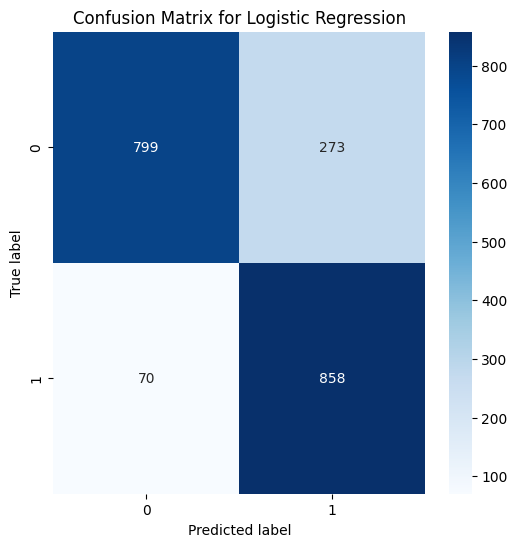

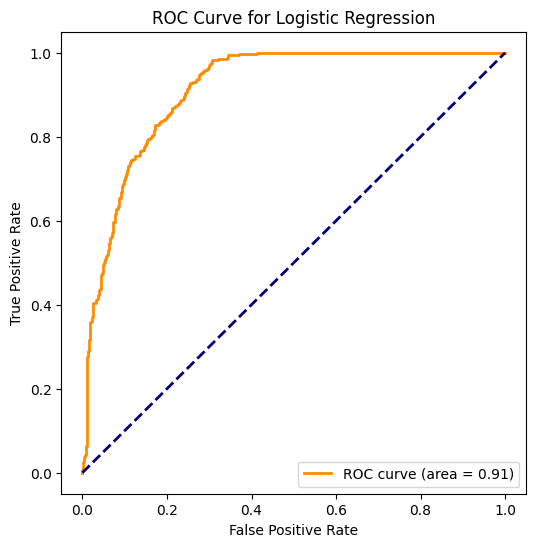

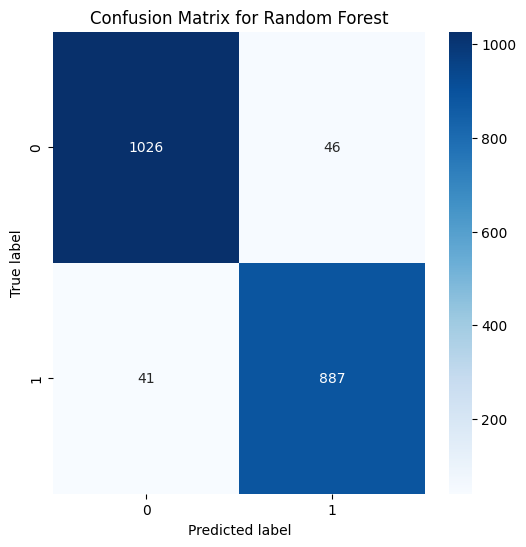

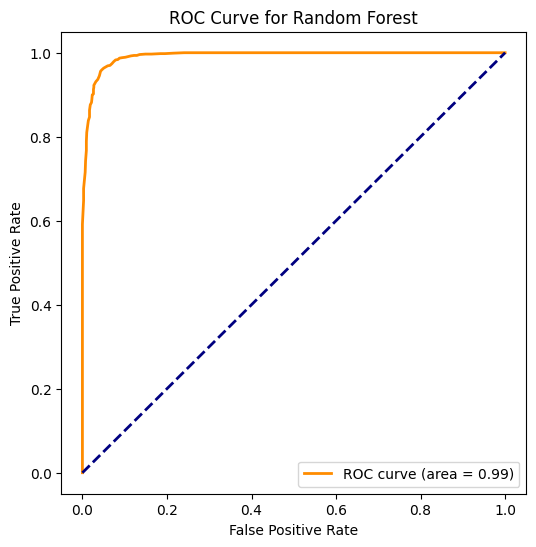

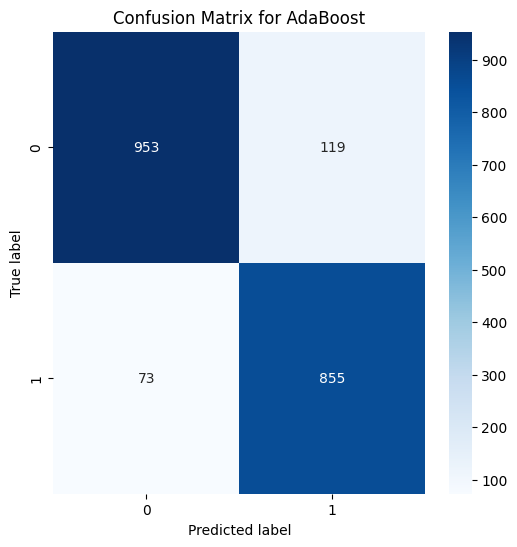

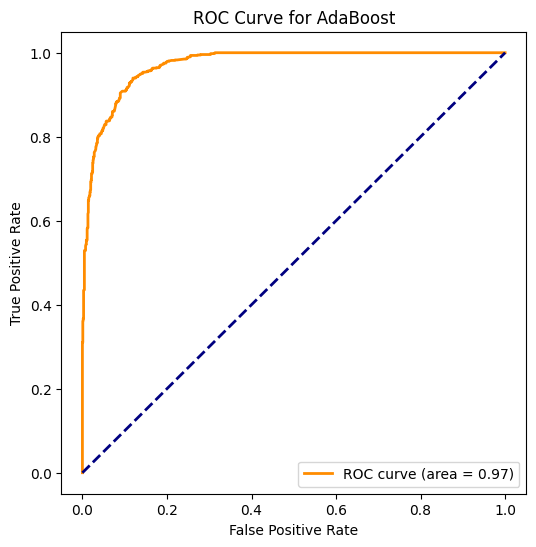

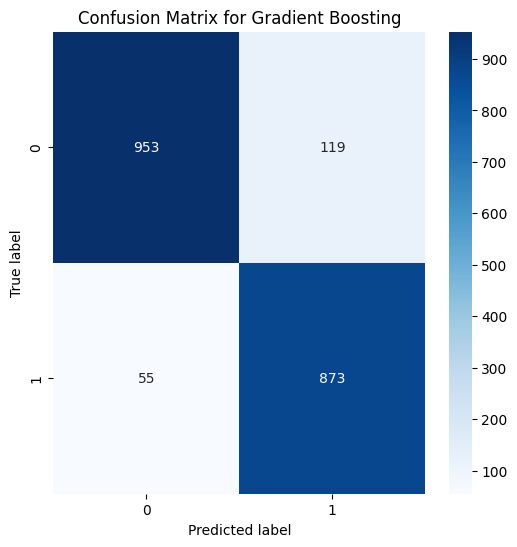

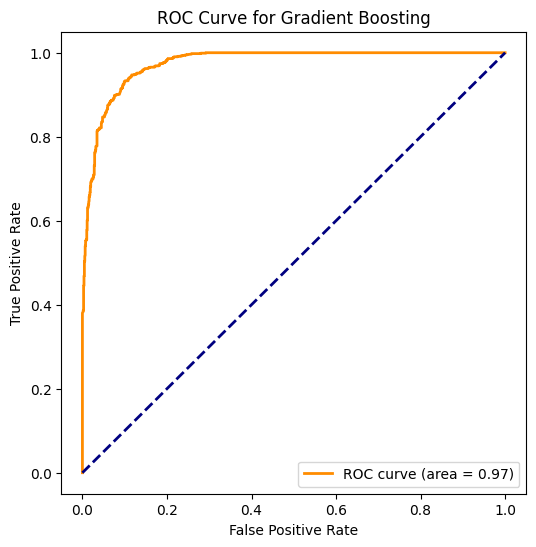

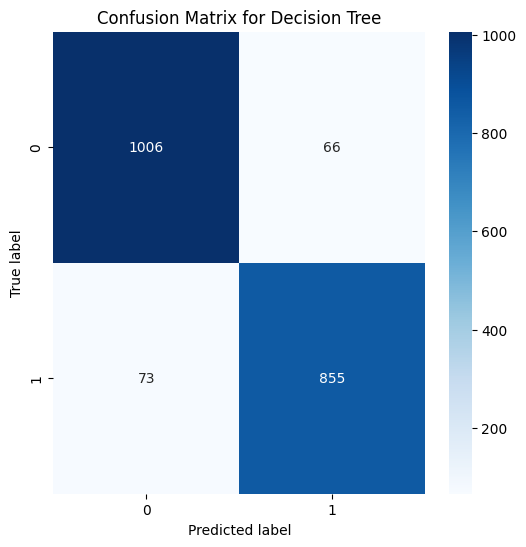

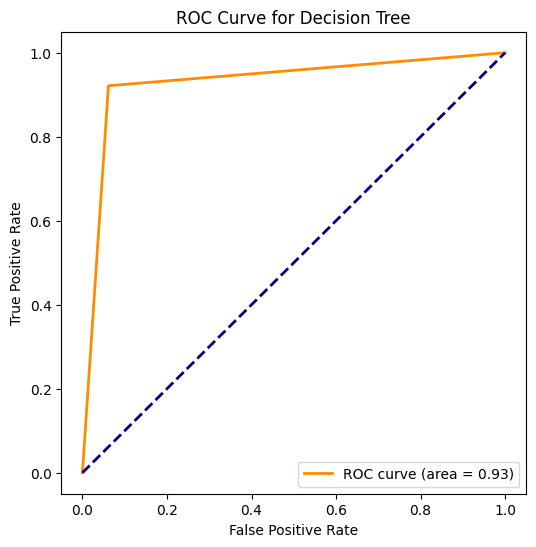


Logistic Regression Classifier:
Accuracy: 0.8285 
F1-Score: 0.8334142787761049

Random Forest Classifier:
Accuracy: 0.9565 
F1-Score: 0.953250940354648

AdaBoost Classifier:
Accuracy: 0.904 
F1-Score: 0.8990536277602523

Gradient Boosting Classifier:
Accuracy: 0.913 
F1-Score: 0.9093749999999999

Decision Tree Classifier:
Accuracy: 0.9305 
F1-Score: 0.9248242293131422

Process Completed - Time: 0:00:13.821594


In [12]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

def record_time(step_name, overall_start_time):
    print(f"{step_name} - Time Elapsed: {datetime.datetime.now() - overall_start_time}")

def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_scores, classifier_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv')

overall_start_time = datetime.datetime.now()
record_time("Dataset Loaded", overall_start_time)

# Define a function to label traffic as normal or malicious
def label_traffic(df):
    # Define normal thresholds
    normal_protocols = [6, 17, 1]  # TCP and UDP
    normal_port_range = set(range(0, 49152))
    normal_pkt_count_max = 2000
    normal_octet_count_max = 1000000
    normal_packet_size_range = range(20, 1500)
    normal_flow_duration_range = range(50, 3600000)  # 50 ms to 1 hour
    normal_piat_range = range(0, 10000)  # 0 to 10 seconds
    max_timestamp = int(1e12)  # Assuming timestamp in milliseconds

    # Initialize the traffic_label column
    df['traffic_label'] = 'normal'

    # Vectorized conditions
    df.loc[~df['proto'].isin(normal_protocols), 'traffic_label'] = 'malicious'
    df.loc[df['flowEndReason'] == 1, 'traffic_label'] = 'malicious'
    df.loc[~df['src_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[~df['dst_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[df['pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
    df.loc[df['octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
    df.loc[~df['min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
    df.loc[~df['min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[(df['flowStart'] < 0) | (df['flowStart'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[(df['flowEnd'] < 0) | (df['flowEnd'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[df['flowEnd'] < df['flowStart'], 'traffic_label'] = 'malicious'

    # Process forward and backward flow features
    for prefix in ['f_', 'b_']:
        df.loc[df[prefix + 'pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
        df.loc[df[prefix + 'octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'

    # IP Address checks
    normal_src_ip_ranges = ['192.168.', '10.', '172.']
    df.loc[df['src_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'
    df.loc[df['dst_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'

    # Web service, application protocol, and category checks
    normal_web_services = ['Google', 'Microsoft', 'HTTP', 'DNS', 'Amazon', 'MSN', 'TLS', 'Yahoo', 'DHCP', 'WindowsUpdate', 'NetBIOS', 'RX', 'MS_OneDrive', 'GMail', 'Dropbox', 'GoogleServices', 'ICMP', 'UbuntuONE', 'GoogleDrive', 'YouTube', 'HTTP_Proxy', 'NTP', 'Apple', 'AppleiTunes', 'AppleStore', 'ApplePush', 'AppleiCloud', 'IMAPS', 'IMO', 'Office365', 'Skype', 'Cloudflare']
    normal_application_protocols = ['HTTP', 'TLS', 'DNS', 'QUIC', 'IMAPS', 'STUN', 'SMTPS', 'POPS', 'Skype', 'SMBv23', 'NetBIOS', 'RDP', 'ApplePush', 'MQTT']
    normal_categories = ['Network', 'Web', 'SoftwareUpdate', 'RPC', 'System', 'Cloud', 'Mail', 'FTP', 'VPN', 'RemoteAccess', 'Email', 'Media', 'Streaming', 'VoIP', 'Collaborative']

    df.loc[~df['web_service'].isin(normal_web_services), 'traffic_label'] = 'malicious'
    df.loc[~df['application_protocol'].isin(normal_application_protocols), 'traffic_label'] = 'malicious'
    df.loc[~df['category'].isin(normal_categories), 'traffic_label'] = 'malicious'

    return df

df = label_traffic(df)
record_time("Labeling Function Applied", overall_start_time)

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['traffic_label'])
record_time("Categorical Labels Encoded", overall_start_time)

X = df.drop(columns=['traffic_label', 'category_encoded'])
y = df['category_encoded']
record_time("Features and Target Variable Defined", overall_start_time)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
record_time("Data Split into Train and Test Sets", overall_start_time)

non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
X_train = X_train.drop(non_numeric_columns, axis=1)
X_test = X_test.drop(non_numeric_columns, axis=1)
record_time("Non-numeric Columns Handled", overall_start_time)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
record_time("Preprocessing Applied", overall_start_time)

# Define a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grids
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for each classifier
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=stratified_kfold)
ab_clf = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid=param_grid_ab, cv=stratified_kfold)
gb_clf = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=stratified_kfold)
dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=stratified_kfold)

# Define and fit the classifiers
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
ab_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

lr_clf.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
ab_clf.fit(X_train_scaled, y_train)
gb_clf.fit(X_train_scaled, y_train)
dt_clf.fit(X_train_scaled, y_train)
record_time("Classifiers Fitted", overall_start_time)

# Evaluate models and plot confusion matrices and ROC curves
for clf, name in [(lr_clf, 'Logistic Regression'), (rf_clf, 'Random Forest'), (ab_clf, 'AdaBoost'), (gb_clf, 'Gradient Boosting'), (dt_clf, 'Decision Tree')]:
    # Predictions and probabilities
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    plot_roc_curve(y_test, y_pred_proba, name)

# Calculate accuracy and F1-score for each model
lr_accuracy, lr_f1 = accuracy_score(y_test, lr_clf.predict(X_test_scaled)), f1_score(y_test, lr_clf.predict(X_test_scaled))
rf_accuracy, rf_f1 = accuracy_score(y_test, rf_clf.predict(X_test_scaled)), f1_score(y_test, rf_clf.predict(X_test_scaled))
ab_accuracy, ab_f1 = accuracy_score(y_test, ab_clf.predict(X_test_scaled)), f1_score(y_test, ab_clf.predict(X_test_scaled))
gb_accuracy, gb_f1 = accuracy_score(y_test, gb_clf.predict(X_test_scaled)), f1_score(y_test, gb_clf.predict(X_test_scaled))
dt_accuracy, dt_f1 = accuracy_score(y_test, dt_clf.predict(X_test_scaled)), f1_score(y_test, dt_clf.predict(X_test_scaled))

# Print the results
print("\nLogistic Regression Classifier:\nAccuracy:", lr_accuracy, "\nF1-Score:", lr_f1)
print("\nRandom Forest Classifier:\nAccuracy:", rf_accuracy, "\nF1-Score:", rf_f1)
print("\nAdaBoost Classifier:\nAccuracy:", ab_accuracy, "\nF1-Score:", ab_f1)
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy, "\nF1-Score:", gb_f1)
print("\nDecision Tree Classifier:\nAccuracy:", dt_accuracy, "\nF1-Score:", dt_f1)

print("\nProcess Completed - Time:", datetime.datetime.now() - overall_start_time)


In [14]:
class_counts = df['traffic_label'].value_counts()
print(class_counts)


malicious    5359
normal       4641
Name: traffic_label, dtype: int64


In [15]:
class_counts = df['traffic_label'].value_counts()
print(class_counts)


malicious    5359
normal       4641
Name: traffic_label, dtype: int64




Code# 1.3 Implementing the following Machine Learning models: LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

- CrossValidation and Hyperparameter Tuning Applied ## - Model Performance Metrics: accuracy_score, f1_score, confusion_matrix, roc_curve, auc, precision_score, recall_score
-SMOT controlled

Dataset Loaded - Time Elapsed: 0:00:00.000084
Labeling Function Applied - Time Elapsed: 0:00:05.513807
Categorical Labels Encoded - Time Elapsed: 0:00:05.518136
Features and Target Variable Defined - Time Elapsed: 0:00:05.521874
Data Split into Train and Test Sets - Time Elapsed: 0:00:05.532700
Non-numeric Columns Handled - Time Elapsed: 0:00:05.536211
Preprocessing Applied - Time Elapsed: 0:00:05.549177
Classifiers Fitted - Time Elapsed: 0:00:15.269625


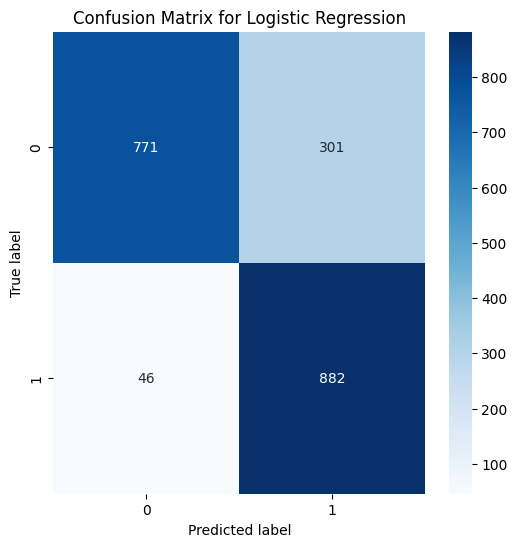

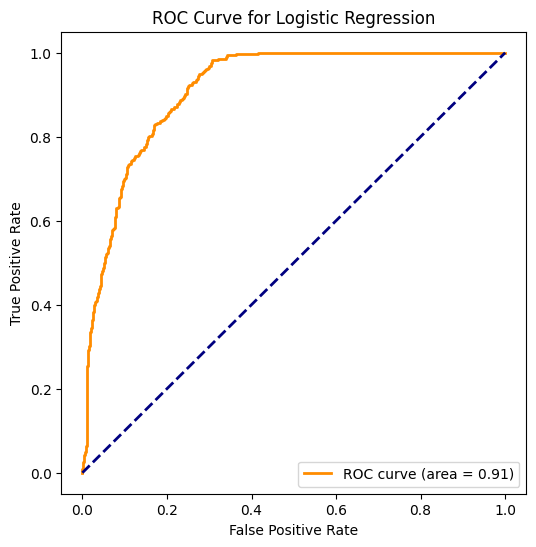

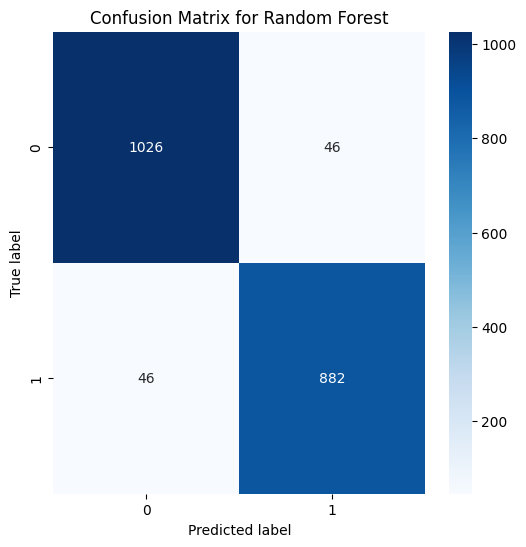

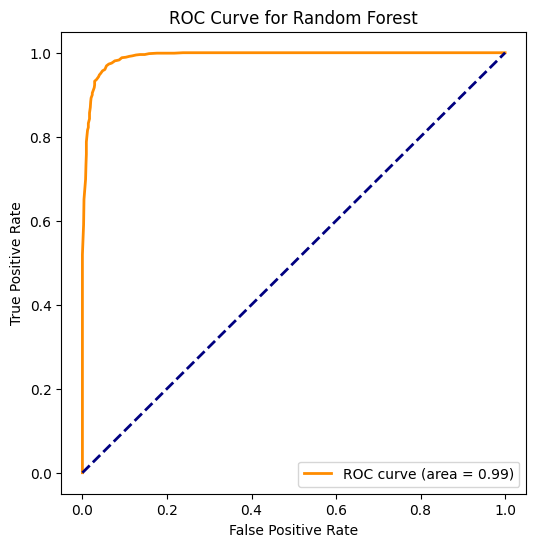

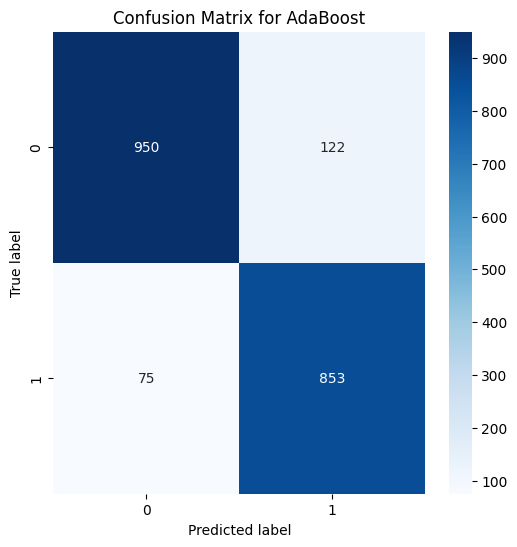

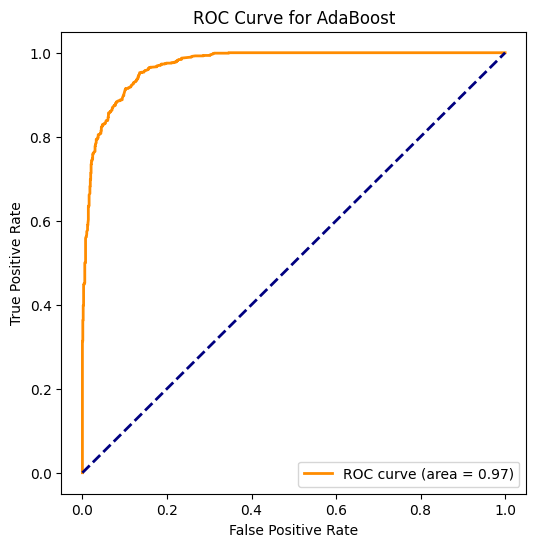

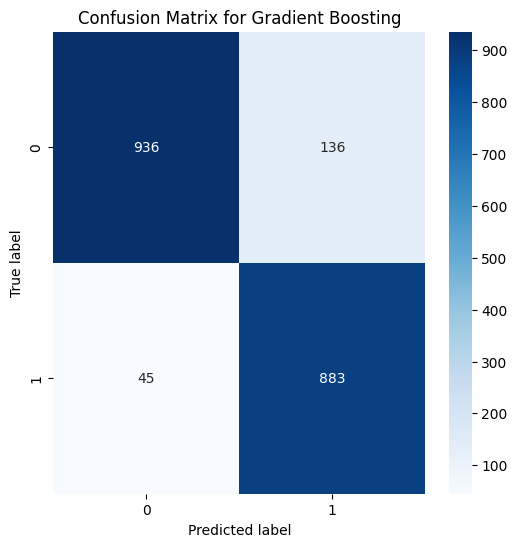

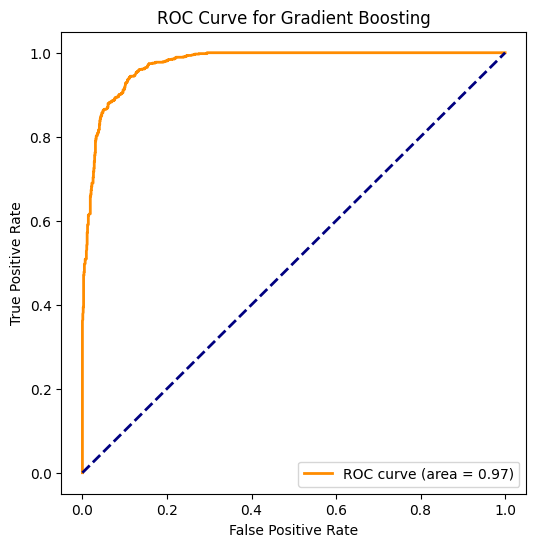

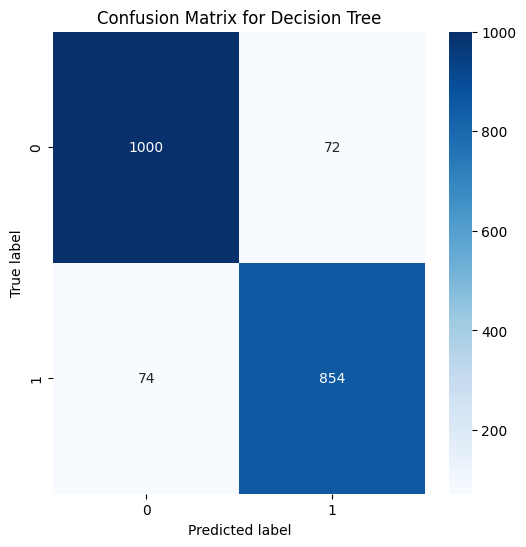

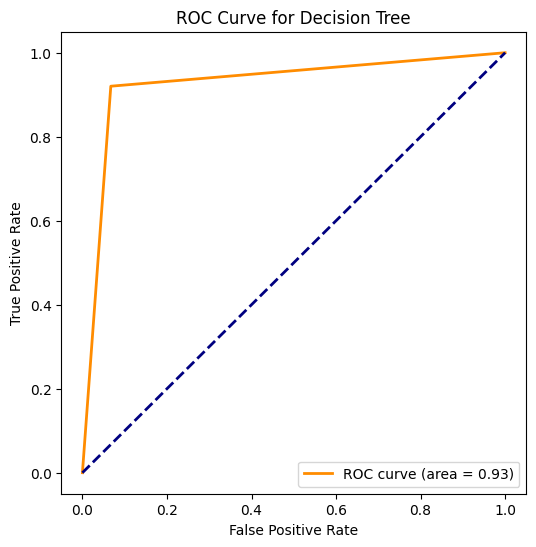


Logistic Regression Classifier:
Accuracy: 0.8265 
F1-Score: 0.8356229275225013

Random Forest Classifier:
Accuracy: 0.954 
F1-Score: 0.9504310344827587

AdaBoost Classifier:
Accuracy: 0.9015 
F1-Score: 0.8964792433000525

Gradient Boosting Classifier:
Accuracy: 0.9095 
F1-Score: 0.9070364663585002

Decision Tree Classifier:
Accuracy: 0.927 
F1-Score: 0.9212513484358144

Process Completed - Time: 0:00:17.626019


In [17]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE

def record_time(step_name, overall_start_time):
    print(f"{step_name} - Time Elapsed: {datetime.datetime.now() - overall_start_time}")

def plot_confusion_matrix(cm, classifier_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_roc_curve(y_true, y_scores, classifier_name):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {classifier_name}')
    plt.legend(loc='lower right')
    plt.show()

# Load the dataset
df = pd.read_csv('Unicauca-dataset-April-June-2019-Network-flows-10000rows(ALLFEATURES).csv')

overall_start_time = datetime.datetime.now()
record_time("Dataset Loaded", overall_start_time)

# Define a function to label traffic as normal or malicious
def label_traffic(df):
    # Define normal thresholds
    normal_protocols = [6, 17, 1]  # TCP and UDP
    normal_port_range = set(range(0, 49152))
    normal_pkt_count_max = 2000
    normal_octet_count_max = 1000000
    normal_packet_size_range = range(20, 1500)
    normal_flow_duration_range = range(50, 3600000)  # 50 ms to 1 hour
    normal_piat_range = range(0, 10000)  # 0 to 10 seconds
    max_timestamp = int(1e12)  # Assuming timestamp in milliseconds

    # Initialize the traffic_label column
    df['traffic_label'] = 'normal'

    # Vectorized conditions
    df.loc[~df['proto'].isin(normal_protocols), 'traffic_label'] = 'malicious'
    df.loc[df['flowEndReason'] == 1, 'traffic_label'] = 'malicious'
    df.loc[~df['src_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[~df['dst_port'].isin(normal_port_range), 'traffic_label'] = 'malicious'
    df.loc[df['pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
    df.loc[df['octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
    df.loc[~df['min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
    df.loc[~df['flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
    df.loc[~df['min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[~df['std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
    df.loc[(df['flowStart'] < 0) | (df['flowStart'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[(df['flowEnd'] < 0) | (df['flowEnd'] > max_timestamp), 'traffic_label'] = 'malicious'
    df.loc[df['flowEnd'] < df['flowStart'], 'traffic_label'] = 'malicious'

    # Process forward and backward flow features
    for prefix in ['f_', 'b_']:
        df.loc[df[prefix + 'pktTotalCount'] > normal_pkt_count_max, 'traffic_label'] = 'malicious'
        df.loc[df[prefix + 'octetTotalCount'] > normal_octet_count_max, 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_ps'].isin(normal_packet_size_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'flowDuration'].isin(normal_flow_duration_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'min_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'max_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'avg_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'
        df.loc[~df[prefix + 'std_dev_piat'].isin(normal_piat_range), 'traffic_label'] = 'malicious'

    # IP Address checks
    normal_src_ip_ranges = ['192.168.', '10.', '172.']
    df.loc[df['src_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'
    df.loc[df['dst_ip'].apply(lambda ip: any(ip.startswith(range) for range in normal_src_ip_ranges)), 'traffic_label'] = 'normal'

    # Web service, application protocol, and category checks
    normal_web_services = ['Google', 'Microsoft', 'HTTP', 'DNS', 'Amazon', 'MSN', 'TLS', 'Yahoo', 'DHCP', 'WindowsUpdate', 'NetBIOS', 'RX', 'MS_OneDrive', 'GMail', 'Dropbox', 'GoogleServices', 'ICMP', 'UbuntuONE', 'GoogleDrive', 'YouTube', 'HTTP_Proxy', 'NTP', 'Apple', 'AppleiTunes', 'AppleStore', 'ApplePush', 'AppleiCloud', 'IMAPS', 'IMO', 'Office365', 'Skype', 'Cloudflare']
    normal_application_protocols = ['HTTP', 'TLS', 'DNS', 'QUIC', 'IMAPS', 'STUN', 'SMTPS', 'POPS', 'Skype', 'SMBv23', 'NetBIOS', 'RDP', 'ApplePush', 'MQTT']
    normal_categories = ['Network', 'Web', 'SoftwareUpdate', 'RPC', 'System', 'Cloud', 'Mail', 'FTP', 'VPN', 'RemoteAccess', 'Email', 'Media', 'Streaming', 'VoIP', 'Collaborative']

    df.loc[~df['web_service'].isin(normal_web_services), 'traffic_label'] = 'malicious'
    df.loc[~df['application_protocol'].isin(normal_application_protocols), 'traffic_label'] = 'malicious'
    df.loc[~df['category'].isin(normal_categories), 'traffic_label'] = 'malicious'

    return df

df = label_traffic(df)
record_time("Labeling Function Applied", overall_start_time)

label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['traffic_label'])
record_time("Categorical Labels Encoded", overall_start_time)

X = df.drop(columns=['traffic_label', 'category_encoded'])
y = df['category_encoded']
record_time("Features and Target Variable Defined", overall_start_time)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
record_time("Data Split into Train and Test Sets", overall_start_time)

non_numeric_columns = X_train.select_dtypes(exclude=[np.number]).columns
X_train = X_train.drop(non_numeric_columns, axis=1)
X_test = X_test.drop(non_numeric_columns, axis=1)
record_time("Non-numeric Columns Handled", overall_start_time)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
record_time("Preprocessing Applied", overall_start_time)

# Define a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Apply SMOTE to address class imbalance (Before GridSearchCV)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Hyperparameter grids
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
}
param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
}
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for each classifier
rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=stratified_kfold)
ab_clf = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid=param_grid_ab, cv=stratified_kfold)
gb_clf = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=param_grid_gb, cv=stratified_kfold)
dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=stratified_kfold)

# Define and fit the classifiers (After GridSearchCV)
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
ab_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

lr_clf.fit(X_train_resampled, y_train_resampled)
rf_clf.fit(X_train_resampled, y_train_resampled)
ab_clf.fit(X_train_resampled, y_train_resampled)
gb_clf.fit(X_train_resampled, y_train_resampled)
dt_clf.fit(X_train_resampled, y_train_resampled)
record_time("Classifiers Fitted", overall_start_time)

# Evaluate models and plot confusion matrices and ROC curves
for clf, name in [(lr_clf, 'Logistic Regression'), (rf_clf, 'Random Forest'), (ab_clf, 'AdaBoost'), (gb_clf, 'Gradient Boosting'), (dt_clf, 'Decision Tree')]:
    # Predictions and probabilities
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    plot_roc_curve(y_test, y_pred_proba, name)

# Calculate accuracy and F1-score for each model
lr_accuracy, lr_f1 = accuracy_score(y_test, lr_clf.predict(X_test_scaled)), f1_score(y_test, lr_clf.predict(X_test_scaled))
rf_accuracy, rf_f1 = accuracy_score(y_test, rf_clf.predict(X_test_scaled)), f1_score(y_test, rf_clf.predict(X_test_scaled))
ab_accuracy, ab_f1 = accuracy_score(y_test, ab_clf.predict(X_test_scaled)), f1_score(y_test, ab_clf.predict(X_test_scaled))
gb_accuracy, gb_f1 = accuracy_score(y_test, gb_clf.predict(X_test_scaled)), f1_score(y_test, gb_clf.predict(X_test_scaled))
dt_accuracy, dt_f1 = accuracy_score(y_test, dt_clf.predict(X_test_scaled)), f1_score(y_test, dt_clf.predict(X_test_scaled))

# Print the results
print("\nLogistic Regression Classifier:\nAccuracy:", lr_accuracy, "\nF1-Score:", lr_f1)
print("\nRandom Forest Classifier:\nAccuracy:", rf_accuracy, "\nF1-Score:", rf_f1)
print("\nAdaBoost Classifier:\nAccuracy:", ab_accuracy, "\nF1-Score:", ab_f1)
print("\nGradient Boosting Classifier:\nAccuracy:", gb_accuracy, "\nF1-Score:", gb_f1)
print("\nDecision Tree Classifier:\nAccuracy:", dt_accuracy, "\nF1-Score:", dt_f1)

print("\nProcess Completed - Time:", datetime.datetime.now() - overall_start_time)


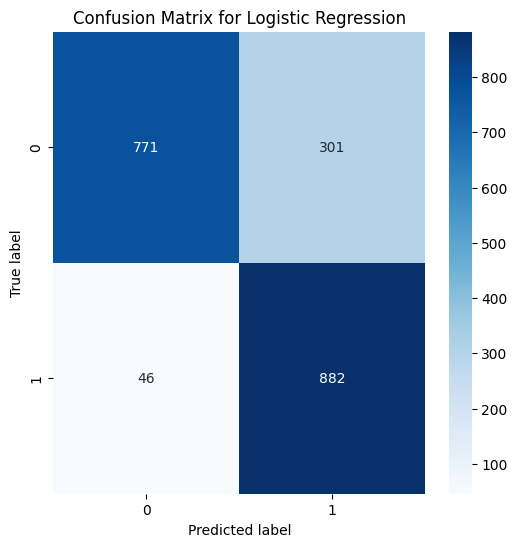

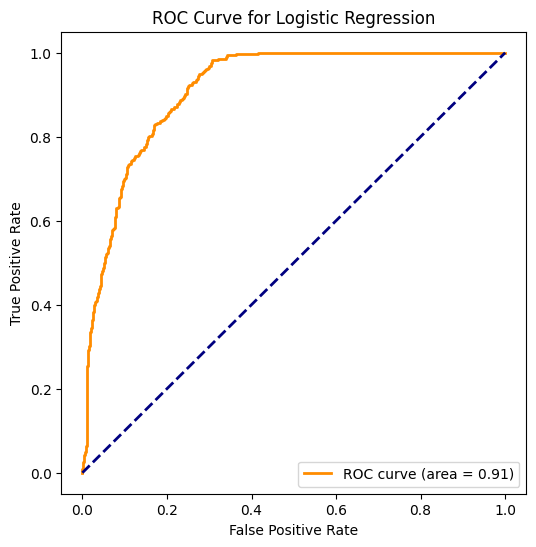


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

      normal       0.94      0.72      0.82      1072
   malicious       0.75      0.95      0.84       928

    accuracy                           0.83      2000
   macro avg       0.84      0.83      0.83      2000
weighted avg       0.85      0.83      0.83      2000



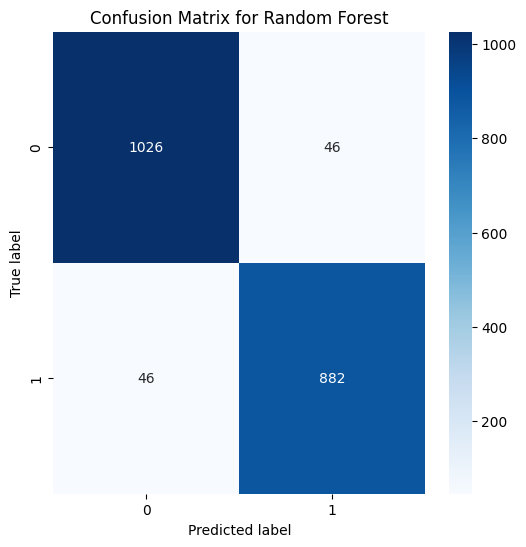

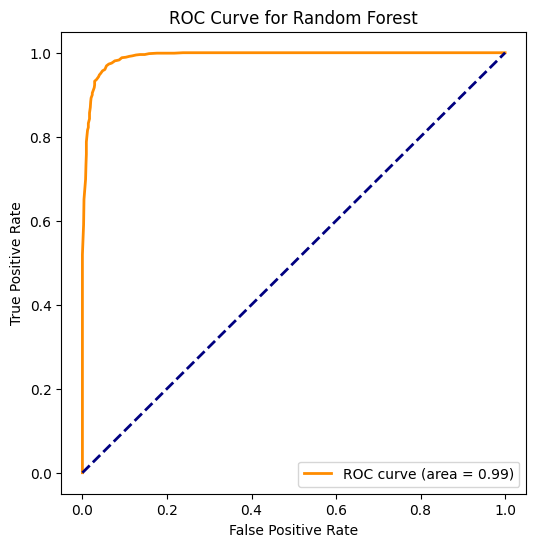


Classification Report for Random Forest:
              precision    recall  f1-score   support

      normal       0.96      0.96      0.96      1072
   malicious       0.95      0.95      0.95       928

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



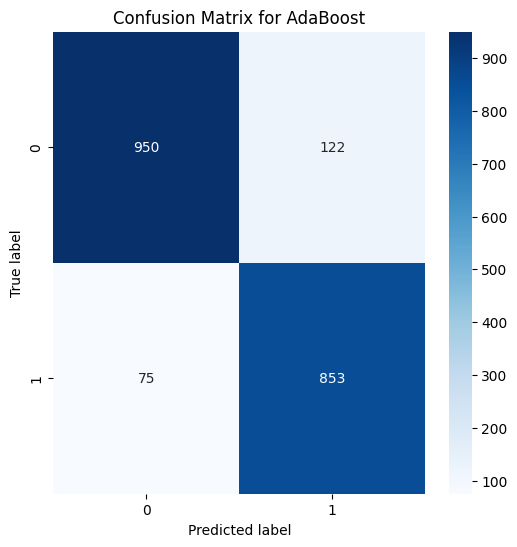

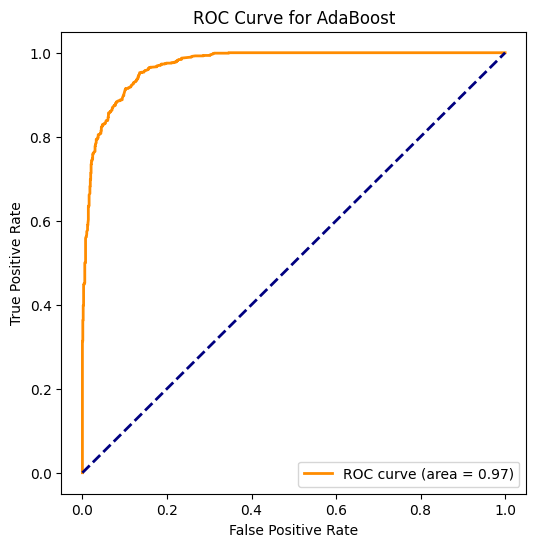


Classification Report for AdaBoost:
              precision    recall  f1-score   support

      normal       0.93      0.89      0.91      1072
   malicious       0.87      0.92      0.90       928

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



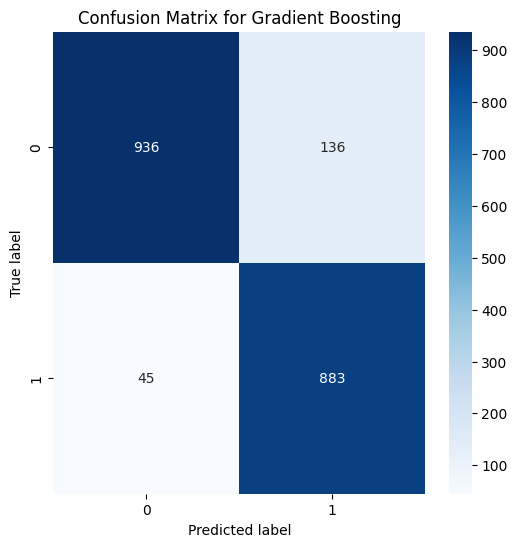

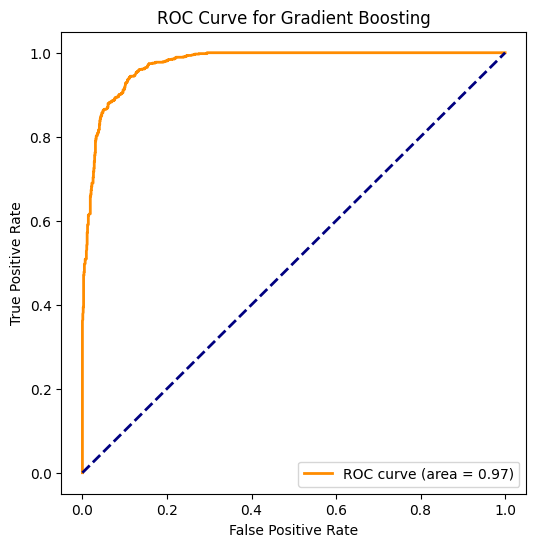


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

      normal       0.95      0.87      0.91      1072
   malicious       0.87      0.95      0.91       928

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



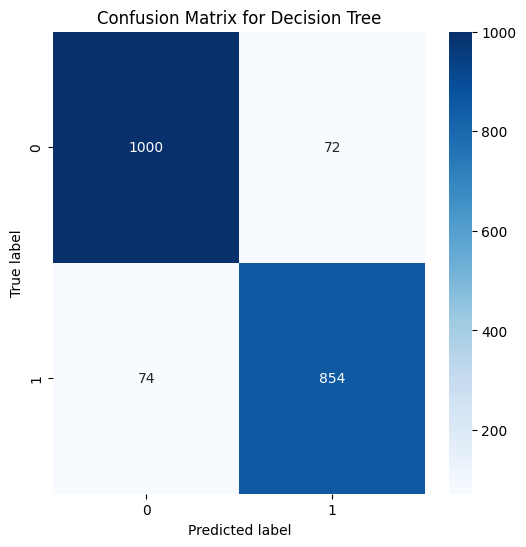

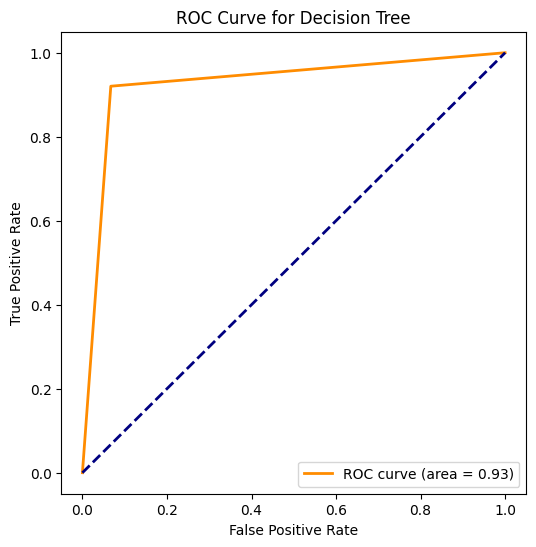


Classification Report for Decision Tree:
              precision    recall  f1-score   support

      normal       0.93      0.93      0.93      1072
   malicious       0.92      0.92      0.92       928

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [19]:
from sklearn.metrics import classification_report

# Evaluate models and plot confusion matrices and ROC curves
for clf, name in [(lr_clf, 'Logistic Regression'), (rf_clf, 'Random Forest'), (ab_clf, 'AdaBoost'), (gb_clf, 'Gradient Boosting'), (dt_clf, 'Decision Tree')]:
    # Predictions and probabilities
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, name)

    # ROC curve
    plot_roc_curve(y_test, y_pred_proba, name)

    # Classification report (including recall and precision)
    report = classification_report(y_test, y_pred, target_names=['normal', 'malicious'])
    print(f"\nClassification Report for {name}:\n{report}")

In [18]:
class_counts = df['traffic_label'].value_counts()
print(class_counts)

malicious    5359
normal       4641
Name: traffic_label, dtype: int64
